In [309]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import datetime
import sys
sys.path.insert(0, '/home/disk/p/jkcm/Code')
from Lagrangian_CSET.CSET_data_classes import CSET_Flight
from Lagrangian_CSET import utils
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap

%load_ext autoreload
%autoreload 2

from scipy.io import readsav



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [311]:
filename = '/home/disk/eos4/robwood/MODIS/L2/allc6/idlsave/MYDmodis_collate_basedata_allc6_2015_180_249.idl'
x = readsav(filename)
x.keys()

dict_keys(['lwpall', 'pall_calipso', 'b4all', 'b1all', 'mln', 'lhall', 'sdln', 'chi2_lnall', 'tall_calipso', 'shall', 'b0all', 'intall', 'varall', 'staball', 'dinvar', 'reall', 'lhchall', 'cfall1', 'cfall_ret', 'stabchall', 'pdfvarall', 'dskew', 'b3all', 'dinkurt', 'latall', 'staball_era', 'lnb2all', 'chi2_gammleall', 'pall', 'lonall', 'lnb1all', 'lnb3all', 'dayall', 'chi2_gammomall', 'beta', 'lnb0all', 'alpha', 'cfall2', 'lnb4all', 'dinskew', 'intall2', 'intall3', 'tadvall', 'omegaall', 'shchall', 'iindex_all', 'dfitvar0all', 'omegachall', 'count', 'b2all', 'dfitvar1all', 'sunglint_info_all', 'tall'])

In [362]:
lats = x.latall[1:].copy()
lons = x.lonall[1:].copy()
times = x.dayall[1:].copy()

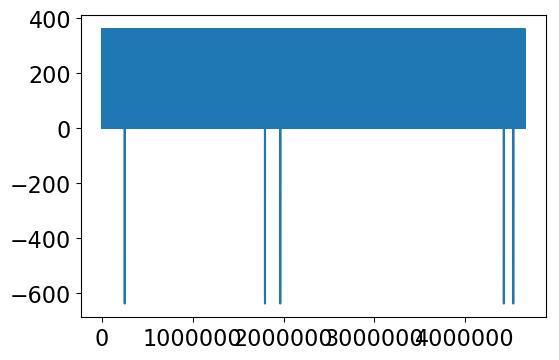

In [366]:
plt.plot(lons)

In [360]:
index = np.all([lats>35, lats<36, lons>23])

array([  280.33   ,   279.59   ,   283.65   ,   285.93   ,   280.31   ,
         280.31   ,   280.59   ,   282.33   ,   280.55   ,   280.50998,
         271.21   ,   281.     ,   281.29   ,   281.29   ,   281.00998,
         281.00998,   281.33   ,   281.58   ,   280.94998,   282.16998,
         282.43   ,   280.78   ,   280.78   ,   282.19   ,   280.79   ,
         281.81   ,   281.9    ,   281.22998,   281.     ,   282.78   ,
         282.35   ,   281.13   ,   281.29   ,   281.58   ,   281.82   ,
         282.16998,   282.12   ,   282.31   ,   281.52   ,   281.52   ,
         281.91   ,   280.79   ,   280.99   ,   282.38998,   282.94   ,
         282.91   ,   282.83   ,   282.35   ,   281.37   ,   282.88   ,
         281.66   ,   281.35   ,   282.16   ,   281.91998,   281.56   ,
         281.52   ,   281.91   ,   282.29   ,   281.6    ,   280.96   ,
         282.71   ,   283.1    ,   283.56   ,   285.63998,   287.88   ,
         286.75   ,   283.12   ,   282.69998,   282.6    ,   282

In [348]:
cfs = x.cfall1[1:].copy()

In [4]:
data = xr.open_dataset(r'/home/disk/eos4/robwood/MODIS/L2/allc6/idlsave/MYDscene_type_index_allc6_2015_180_249.idl.nc')

In [99]:
scene_dict = {-1: 'NC',
              0: 'open',
              1: 'closed',
              2: 'homogen',
              3: 'disorg',
              4: 'too clear'}

scenes = data.SCENE_TYPE.values.squeeze()
scenes[scenes<-9000] = -1
scenes = scenes.astype(int)
lats = data.LATALL.values.squeeze()
lons = data.LONALL.values.squeeze()
days = data.DAYALL.values.squeeze()
lats[lats<-200] = np.nan
lons[lons<-200] = np.nan
lons = (lons+179)%360 - 179
local_days = days + lons/360
int_local_days = local_days.astype(int)

int_days = days.astype(int)
print("scenes per day: {}".format(len(scenes)/(max(days)-min(days))))

good_scenes = scenes[scenes>-1]
print("good scenes per day: {}".format(len(good_scenes)/(max(days)-min(days))))
for i in set(good_scenes):
    count = len(np.argwhere(good_scenes==i))
    print("scene type {}: count {} ({:0.2%})".format(i, count, count/len(good_scenes)))

/home/disk/p/jkcm/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in less
/home/disk/p/jkcm/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in less


scenes per day: 66554.90778263079
good scenes per day: 6411.990104837451
scene type 0: count 83756 (18.66%)
scene type 1: count 66797 (14.88%)
scene type 2: count 1 (0.00%)
scene type 3: count 285117 (63.53%)
scene type 4: count 13146 (2.93%)


In [31]:
type_2 = scenes == 2
lats[type_2], lons[type_2], days

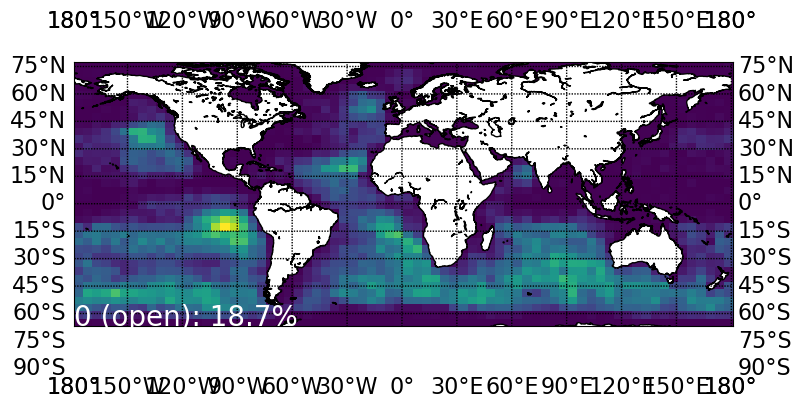

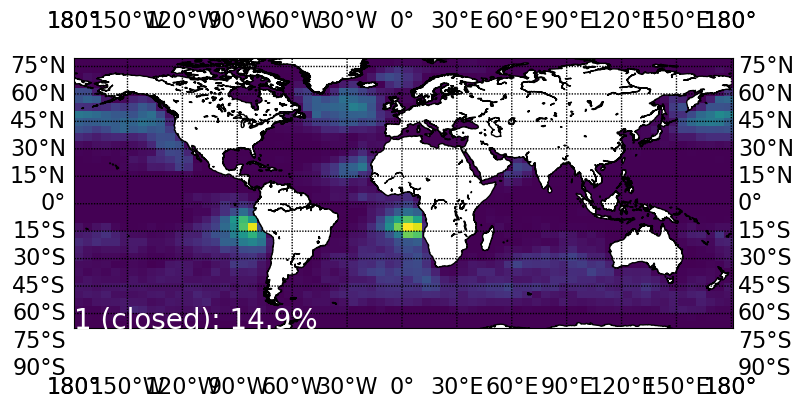

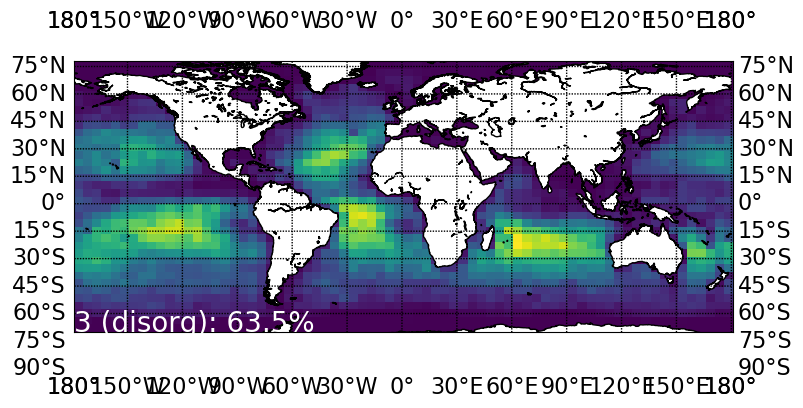

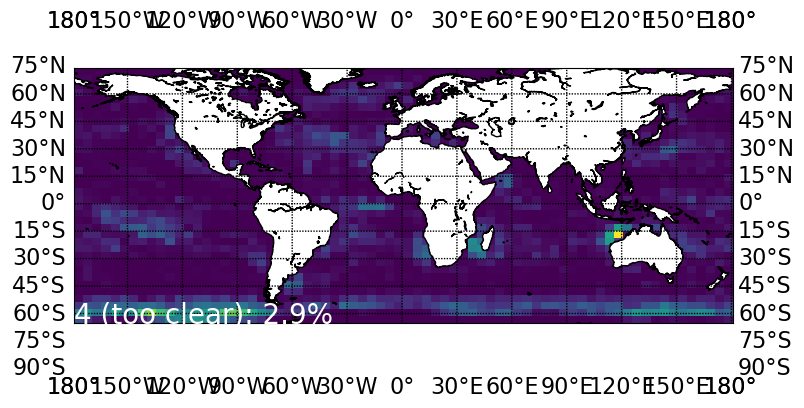

In [48]:
# mask = range(len(lats))[::100]

for i,n in enumerate([0, 1, 3, 4]):
    fig, ax = plt.subplots(figsize=(8.5,5))
    mask = np.argwhere(scenes==n)
    frac = len(mask)/len(good_scenes)
    llr = {'lat': (-90, 90), 'lon': (-180, 180)}
    m = utils.bmap(ax=ax, llr=llr, merspace=30)
    sc = plt.hist2d(lons[mask].squeeze(), lats[mask].squeeze(), bins=[72, 36])
    ax.text(0, 0, '{} ({}): {:0.1%}'.format(n, scene_dict[n], frac), color='w', fontsize=20, transform=ax.transAxes)
# sc = m.scatter(lons[mask], lats[mask], c=scenes[mask])

# plt.colorbar(sc)

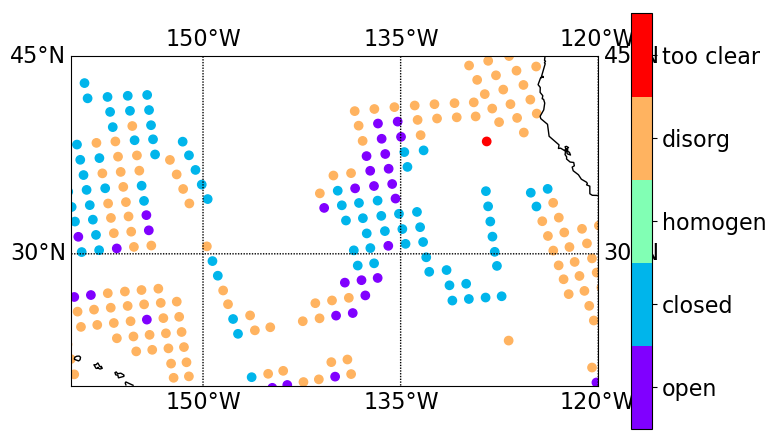

In [196]:


fig, ax = plt.subplots(figsize=(8.5,5.5))
llr = {'lat': (20, 45), 'lon': (-160, -120)}
# llr = {'lat': (-90, 90), 'lon': (0, 360)}
m = utils.bmap(ax=ax, llr=llr)


day = 182
lat = lats[int_local_days==day]
lon = lons[int_local_days==day]
scene = scenes[int_local_days==day].astype(float)
scene[scene==-1] = np.nan

sc = m.scatter(lon, lat, c=scene, cmap='rainbow')
cb = plt.colorbar(sc, boundaries=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5])
cb.set_ticks(sorted(scene_dict.keys()))
cb.set_ticklabels([scene_dict[i] for i in cb.get_ticks()])

In [349]:
llr={'lat': (20, 45), 'lon': (-160, -120)}
in_mask = np.logical_and(np.logical_and(lats>min(llr['lat']), lats<max(llr['lat'])), np.logical_and(lons>min(llr['lon']), lons<max(llr['lon'])))
lats_nep, lons_nep, days_nep, scenes_nep, local_days_nep, int_local_days_nep = lats[in_mask], lons[in_mask], days[in_mask], scenes[in_mask], local_days[in_mask], int_local_days[in_mask]
cfs_nep = cfs[in_mask]
local_days_nep = days_nep + lons_nep/360

savedict = {'lats_nep': lats_nep,
            'lons_nep': lons_nep, 
            'days_nep': days_nep, 
            'scenes_nep': scenes_nep, 
            'local_days_nep': local_days_nep,
            'int_local_days_nep': int_local_days_nep,
            'cf_nep': cfs_nep}

data_loc = r'/home/disk/eos4/jkcm/Data/CSET/Python/'
with open(os.path.join(data_loc, 'nep_scenes.pickle'), 'wb') as f:
    pickle.dump(savedict, f, pickle.HIGHEST_PROTOCOL)

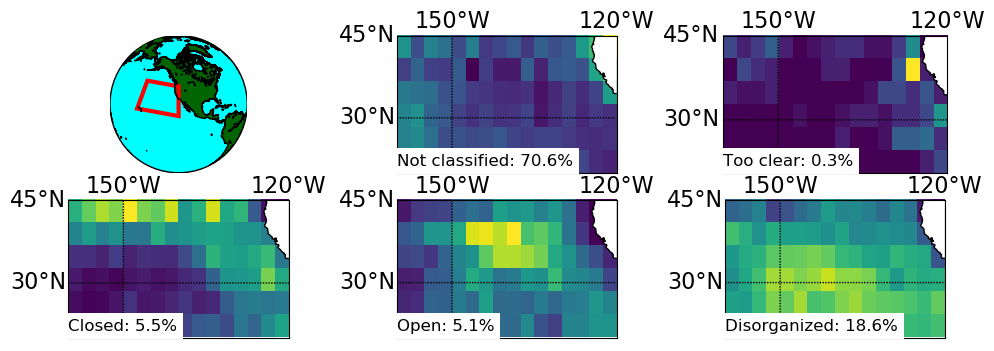

In [351]:
scene_dict = {-1: 'Not classified',
              0: 'Open',
              1: 'Closed',
              2: 'homogen',
              3: 'Disorganized',
              4: 'Too clear'}

fig, ([ax6, ax1, ax5], [ax3, ax2, ax4]) = plt.subplots(nrows=2, ncols=3, figsize=(12,4))#, sharex=True, sharey=True)

for i,(n, axi) in enumerate(zip([-1, 0, 1, 3, 4], [ax1, ax2, ax3, ax4, ax5, ax6])):
    mask = np.argwhere(scenes_nep==n)
    frac = len(mask)/len(scenes_nep)
    llr={'lat': (20, 45), 'lon': (-160, -120)}
    m = utils.bmap(ax=axi, llr=llr, merspace=30, par_labs=[1,0,0,0], mer_labs=[0,0,1,0])
    sc = axi.hist2d(lons_nep[mask].squeeze(), lats_nep[mask].squeeze(), bins=[16, 6])
    axi.text(0, 0.05, '{}: {:0.1%}'.format(scene_dict[n], frac), color='k', fontsize=12, transform=axi.transAxes,
            bbox=dict(facecolor='white', edgecolor='none'))

    
# m = utils.bmap(ax=ax6, llr={'lat': (0, 90), 'lon': (-200, -70)}, 
#                merspace=60, parspace=30, par_labs=[1,0,0,0], mer_labs=[0,0,1,0], 
#                projection='ortho', lon_0=-120, lat_0=30)

m = Basemap(ax=ax6, resolution='l', 
              satellite_height=3000000.,
              projection='ortho', 
              lat_0 = 30., lon_0 = -120.,
#               llcrnrx=500000.,llcrnry=500000.,urcrnrx=2700000.,urcrnry=2700000.
             )

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='darkgreen',lake_color='aqua')
m.drawcoastlines()

x1,y1 = m(-120,20)
x2,y2 = m(-120,45)
x3,y3 = m(-160,45)
x4,y4 = m(-160,20)
poly = patches.Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],facecolor='none',edgecolor='red',linewidth=3)
ax6.add_patch(poly)
# ax6.axis('off')

fig.savefig("/home/disk/p/jkcm/plots/agu/histogram_maps.png", dpi=600, bbox_inches='tight')


In [63]:
data_loc = r'/home/disk/eos4/jkcm/Data/CSET/Python/'
with open(os.path.join(data_loc, 'locs.pickle'), 'rb') as f:
    locs = pickle.load(f)

In [151]:
min_dists = []
best_scenes = []
failed_locs = []
locs_by_scene = {-1: [],
                 0: [],
                 1: [],
                 2: [],
                 3: [],
                 4: []}
for i, loc in enumerate(locs):
    lat, lon = loc[0], loc[1]
    dec_day = loc[2].timetuple().tm_yday + (loc[2].hour + loc[2].minute/60)/24
    local_day = dec_day + lon/360
    matching_days = int_local_days_nep == int(local_day)
    dists = [np.sqrt((lat-lat2)**2 + (lon-lon2)**2) for lat2, lon2 in zip(lats_nep[matching_days], lons_nep[matching_days])]
    if dists:
        best_i = np.argmin(dists)
        if dists[best_i] > 2:
            failed_locs.append(loc)
        else:
            min_dists.append(dists[best_i])
            assert len(scenes_nep[matching_days]) == len(dists)
            scene = scenes_nep[matching_days][best_i]
            best_scenes.append(scene)
            locs_by_scene[scene].append(loc)
    else:
        failed_locs.append(loc)
data_loc = r'/home/disk/eos4/jkcm/Data/CSET/Python/'
with open(os.path.join(data_loc, 'locs_by_scene.pickle'), 'wb') as f:
    pickle.dump(locs_by_scene, f, pickle.HIGHEST_PROTOCOL)

In [147]:
for s in set(best_scenes):
    c = sum(best_scenes==s)
    print("type {} ({}): total count is {}".format(s, scene_dict[s], c))

type 0 (open): total count is 16
type 1 (closed): total count is 8
type 3 (disorg): total count is 30
type 4 (too clear): total count is 1
type -1 (NC): total count is 116


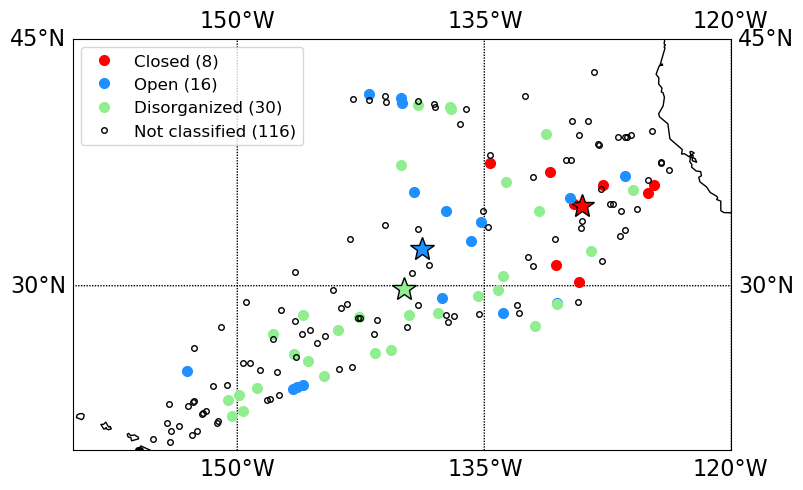

In [308]:
scene_dict = {-1: 'Not classified',
              0: 'Open',
              1: 'Closed',
              2: 'homogen',
              3: 'Disorganized',
              4: 'too clear'}

lats_p, lons_p, scenes_p, dates_p = [], [], [], []
for sc, locs in locs_by_scene.items():
    for loc in locs:
        lats_p.append(loc[0])
        lons_p.append(loc[1])
        dates_p.append(loc[2])
        scenes_p.append(sc)
        
lats_p, lons_p, scenes_p, dates_p = np.array(lats_p), np.array(lons_p), np.array(scenes_p), np.array(dates_p)    
    
fig, ax = plt.subplots(figsize=(8.5,5.5))
llr = {'lat': (20, 45), 'lon': (-160, -120)}
# llr = {'lat': (-90, 90), 'lon': (0, 360)}
m = utils.bmap(ax=ax, llr=llr)

for (i, col) in zip([1, 0, 3], ['red', 'dodgerblue', 'lightgreen']):
    idx = scenes_p == i
    m.plot(lons_p[idx], lats_p[idx], '.', ms=14, c=col, label=scene_dict[i]+" ({})".format(sum(idx)))
    lat_center, lon_center = np.nanmean(lats_p[idx]), np.nanmean(lons_p[idx])
    m.plot(lon_center, lat_center, '*', ms=18, c=col, mec='k')
    
m.plot(lons_p[scenes_p==-1], lats_p[scenes_p==-1], 'o', ms=4, c='k', mfc='none', 
       label = scene_dict[-1]+" ({})".format(sum(scenes_p==-1)))

plt.legend(loc='upper left', fontsize=12)

fig.savefig("/home/disk/p/jkcm/plots/agu/location_map.png", dpi=600, bbox_inches='tight')

# sc = m.scatter(lons_p, lats_p, c=scenes_p, cmap='rainbow')
# cb = plt.colorbar(sc, boundaries=[-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5])
# cb.set_ticks(sorted(scene_dict.keys()))
# cb.set_ticklabels([scene_dict[i] for i in cb.get_ticks()])